In [5]:
import pandas as pd
import requests
import json

In [6]:
df_token = pd.read_excel('api_token.xlsx')
token = df_token['TOKEN'][0]

In [7]:
begin_dt='20200101'
end_dt = '20220601'
query='Amazon'
filter_query='news_desk:("Business","Technology","U.S.","Workplace","Working")'
sort= 'relevance' # newest, oldest, relevance
pagination = 0

response = requests.get(f'https://api.nytimes.com/svc/search/v2/articlesearch.json? \
                        begin_date={begin_dt}&end_state={end_dt}&q={query} \
                        &fg={filter_query}&page={pagination}&sort={sort}&api-key={token}')



In [10]:
sample = response.json()
ten_article = sample['response']['docs']
df = pd.json_normalize(ten_article)

In [64]:
df['keywords'][0]

[{'name': 'glocations', 'value': 'Brazil', 'rank': 1, 'major': 'N'},
 {'name': 'persons',
  'value': 'Phillips, Dom (Journalist)',
  'rank': 2,
  'major': 'N'},
 {'name': 'persons',
  'value': 'Pereira, Bruno Araujo',
  'rank': 3,
  'major': 'N'},
 {'name': 'subject',
  'value': 'Wildlife Trade and Poaching',
  'rank': 4,
  'major': 'N'},
 {'name': 'glocations', 'value': 'Amazon Jungle', 'rank': 5, 'major': 'N'},
 {'name': 'subject', 'value': 'Indigenous People', 'rank': 6, 'major': 'N'},
 {'name': 'subject',
  'value': 'Murders, Attempted Murders and Homicides',
  'rank': 7,
  'major': 'N'},
 {'name': 'organizations',
  'value': 'Guardian (British Newspaper)',
  'rank': 8,
  'major': 'N'},
 {'name': 'subject', 'value': 'Fishing, Commercial', 'rank': 9, 'major': 'N'},
 {'name': 'subject',
  'value': 'Threats and Threatening Messages',
  'rank': 10,
  'major': 'N'},
 {'name': 'subject', 'value': 'News and News Media', 'rank': 11, 'major': 'N'}]

## VADER Sentiment Analysis

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [16]:
vader = SentimentIntensityAnalyzer()

In [17]:
a = 'This is a good movie'
vader.polarity_scores(a)

{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

In [18]:
a = 'This is a good movie!'
vader.polarity_scores(a)

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4926}

In [19]:
a = 'This is a GOOD movie!'
vader.polarity_scores(a)

{'neg': 0.0, 'neu': 0.505, 'pos': 0.495, 'compound': 0.6027}

In [20]:
a = 'This is a super GOOD movie!'
vader.polarity_scores(a)

{'neg': 0.0, 'neu': 0.338, 'pos': 0.662, 'compound': 0.8327}

### Lexicon update as needed

In [25]:
lex = vader.lexicon # dictionary type
lex

{'$:': -1.5,
 '%)': -0.4,
 '%-)': -1.5,
 '&-:': -0.4,
 '&:': -0.7,
 "( '}{' )": 1.6,
 '(%': -0.9,
 "('-:": 2.2,
 "(':": 2.3,
 '((-:': 2.1,
 '(*': 1.1,
 '(-%': -0.7,
 '(-*': 1.3,
 '(-:': 1.6,
 '(-:0': 2.8,
 '(-:<': -0.4,
 '(-:o': 1.5,
 '(-:O': 1.5,
 '(-:{': -0.1,
 '(-:|>*': 1.9,
 '(-;': 1.3,
 '(-;|': 2.1,
 '(8': 2.6,
 '(:': 2.2,
 '(:0': 2.4,
 '(:<': -0.2,
 '(:o': 2.5,
 '(:O': 2.5,
 '(;': 1.1,
 '(;<': 0.3,
 '(=': 2.2,
 '(?:': 2.1,
 '(^:': 1.5,
 '(^;': 1.5,
 '(^;0': 2.0,
 '(^;o': 1.9,
 '(o:': 1.6,
 ")':": -2.0,
 ")-':": -2.1,
 ')-:': -2.1,
 ')-:<': -2.2,
 ')-:{': -2.1,
 '):': -1.8,
 '):<': -1.9,
 '):{': -2.3,
 ');<': -2.6,
 '*)': 0.6,
 '*-)': 0.3,
 '*-:': 2.1,
 '*-;': 2.4,
 '*:': 1.9,
 '*<|:-)': 1.6,
 '*\\0/*': 2.3,
 '*^:': 1.6,
 ',-:': 1.2,
 "---'-;-{@": 2.3,
 '--<--<@': 2.2,
 '.-:': -1.2,
 '..###-:': -1.7,
 '..###:': -1.9,
 '/-:': -1.3,
 '/:': -1.3,
 '/:<': -1.4,
 '/=': -0.9,
 '/^:': -1.0,
 '/o:': -1.4,
 '0-8': 0.1,
 '0-|': -1.2,
 '0:)': 1.9,
 '0:-)': 1.4,
 '0:-3': 1.5,
 '0:03': 1.9,
 '

In [27]:
sentiment_score = list(lex.values())
sentiment_score.sort()
sentiment_score

[-3.9,
 -3.8,
 -3.8,
 -3.7,
 -3.7,
 -3.7,
 -3.7,
 -3.7,
 -3.6,
 -3.6,
 -3.6,
 -3.6,
 -3.6,
 -3.6,
 -3.6,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.4,
 -3.4,
 -3.4,
 -3.4,
 -3.4,
 -3.4,
 -3.4,
 -3.4,
 -3.4,
 -3.4,
 -3.4,
 -3.4,
 -3.4,
 -3.4,
 -3.4,
 -3.4,
 -3.4,
 -3.4,
 -3.3,
 -3.3,
 -3.3,
 -3.3,
 -3.3,
 -3.3,
 -3.3,
 -3.3,
 -3.3,
 -3.3,
 -3.3,
 -3.3,
 -3.3,
 -3.3,
 -3.3,
 -3.3,
 -3.3,
 -3.3,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.2,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.1,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -3.0,
 -2.9,
 -2.9,
 -2.9,

In [28]:
new_words = {
    'layoff': -2.0,
    'terminate': -3.4,
    'furlough':-2,
    'shutdown':-1
}

In [29]:
vader.lexicon.update(new_words)

In [30]:
vader.lexicon['layoff']

-2.0

In [33]:
df['abstract_score'] = df['abstract'].apply(lambda x: vader.polarity_scores(x)['compound'])

In [35]:
df[['abstract','abstract_score']]

,abstract,abstract_score
0,Dom Phillips and Bruno Pereira set off deep in...,0.1779
1,The e-commerce giant could take a stake in Gru...,-0.1027
2,The e-commerce giant planned to build an airpo...,0.0000
3,A new collaboration between the retailing gian...,0.5106
4,Sales of items including flags and books were ...,-0.2732
5,The company’s consumer and operations business...,0.2023
6,The police in Brazil said on Saturday that the...,-0.7906
7,Paige Thompson’s lawyers said she had been loo...,-0.8271
8,"Probably not very, judging by our past flings ...",0.0000
9,“Net zero emissions” sounds like an ambitious ...,0.4215


In [36]:
# set to display full content

pd.set_option('display.max_colwidth',None)

In [37]:
df[['abstract','abstract_score']]

,abstract,abstract_score
0,Dom Phillips and Bruno Pereira set off deep into the Amazon to meet Indigenous groups patrolling the forest. Then they vanished.,0.1779
1,"The e-commerce giant could take a stake in Grubhub, which is under pressure as delivery demand falls, labor shortages bite and new regulations reduce profits.",-0.1027
2,"The e-commerce giant planned to build an airport cargo center, hire 1,000 workers and invest hundreds of millions of dollars over 20 years.",0.0000
3,A new collaboration between the retailing giant and the food distribution service includes free restaurant delivery for Prime members.,0.5106
4,"Sales of items including flags and books were blocked in the country, where homosexuality is criminalized.",-0.2732
5,The company’s consumer and operations business has experienced a significant shake-up in recent weeks.,0.2023
6,"The police in Brazil said on Saturday that they had arrested another person connected to the deaths of Dom Phillips and Bruno Araújo Pereira, and said the men been shot to death.",-0.7906
7,Paige Thompson’s lawyers said she had been looking for cracks so they could be fixed. A jury found her guilty of wire fraud and hacking charges.,-0.8271
8,"Probably not very, judging by our past flings with online fads.",0.0000
9,"“Net zero emissions” sounds like an ambitious goal, but for most corporations, it’s just kicking the can down the road.",0.4215


In [39]:
# reset the col width
pd.reset_option('display.max_colwidth',None)

In [41]:
df['abstract_sentiment'] = df['abstract_score'].apply(lambda x: 'Positive' if x >=0.05 \
                                                      else 'Negative' if x<=-0.05 else 'Neutral')

In [42]:
df[['abstract','abstract_score','abstract_sentiment']]

,abstract,abstract_score,abstract_sentiment
0,Dom Phillips and Bruno Pereira set off deep in...,0.1779,Positive
1,The e-commerce giant could take a stake in Gru...,-0.1027,Negative
2,The e-commerce giant planned to build an airpo...,0.0000,Neutral
3,A new collaboration between the retailing gian...,0.5106,Positive
4,Sales of items including flags and books were ...,-0.2732,Negative
5,The company’s consumer and operations business...,0.2023,Positive
6,The police in Brazil said on Saturday that the...,-0.7906,Negative
7,Paige Thompson’s lawyers said she had been loo...,-0.8271,Negative
8,"Probably not very, judging by our past flings ...",0.0000,Neutral
9,“Net zero emissions” sounds like an ambitious ...,0.4215,Positive


In [50]:
# convert 'pub_date' to datetime
from datetime import datetime

In [47]:
df['pub_date'][0]

'2022-07-11T07:00:01+0000'

In [52]:
df['dt'] = df['pub_date'].apply(lambda x : datetime.fromisoformat(x[:10]))

In [53]:
df[['dt','abstract','abstract_score','abstract_sentiment']]

,dt,abstract,abstract_score,abstract_sentiment
0,2022-07-11,Dom Phillips and Bruno Pereira set off deep in...,0.1779,Positive
1,2022-07-06,The e-commerce giant could take a stake in Gru...,-0.1027,Negative
2,2022-07-07,The e-commerce giant planned to build an airpo...,0.0000,Neutral
3,2022-07-06,A new collaboration between the retailing gian...,0.5106,Positive
4,2022-06-29,Sales of items including flags and books were ...,-0.2732,Negative
5,2022-06-21,The company’s consumer and operations business...,0.2023,Positive
6,2022-06-18,The police in Brazil said on Saturday that the...,-0.7906,Negative
7,2022-06-18,Paige Thompson’s lawyers said she had been loo...,-0.8271,Negative
8,2022-07-12,"Probably not very, judging by our past flings ...",0.0000,Neutral
9,2022-07-12,“Net zero emissions” sounds like an ambitious ...,0.4215,Positive


In [54]:
ts_plot = df.groupby(['dt'])['abstract_score'].mean().to_frame().reset_index()

In [55]:
ts_plot

,dt,abstract_score
0,2022-06-18,-0.80885
1,2022-06-21,0.20230
2,2022-06-29,-0.27320
3,2022-07-06,0.20395
4,2022-07-07,0.00000
5,2022-07-11,0.17790
6,2022-07-12,0.21075


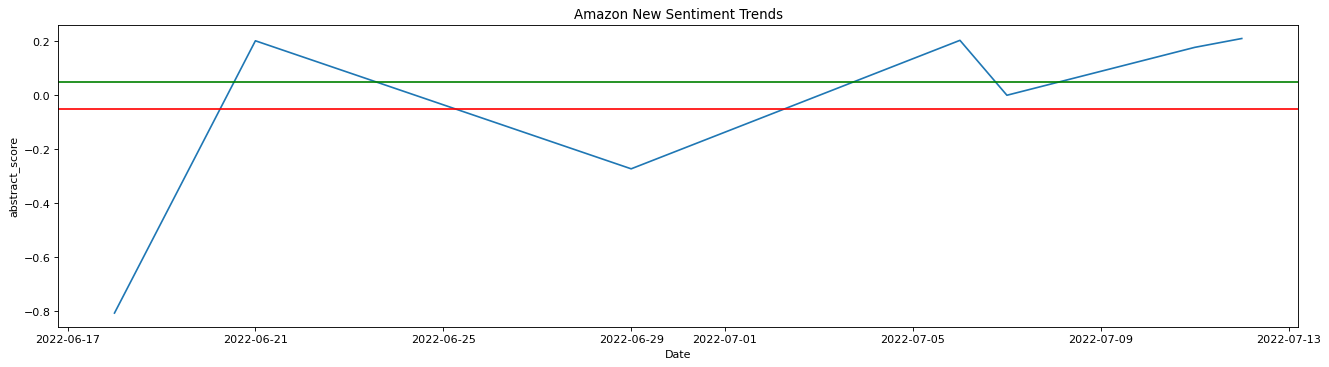

In [61]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20,5),dpi=80)
plt.plot(ts_plot['dt'],ts_plot['abstract_score'])

# add a threshold line
plt.axhline(0.05, color='g')
plt.axhline(-0.05, color='r')

plt.xlabel('Date')
plt.ylabel('abstract_score')
plt.title('Amazon New Sentiment Trends')

plt.show()

In [62]:
ts_plot

,dt,abstract_score
0,2022-06-18,-0.80885
1,2022-06-21,0.20230
2,2022-06-29,-0.27320
3,2022-07-06,0.20395
4,2022-07-07,0.00000
5,2022-07-11,0.17790
6,2022-07-12,0.21075
